In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

En este archivo se exploran las siguientes tres bases de datos:
* ACT
* ACT_DESAGREGADO
* DISNEA

In [2]:
#Importar archivos
ACT_data = pd.read_excel("./Data/ACT.xlsx")
ACT_DESAGREGADO_data = pd.read_excel("./Data/ACT_DESAGREGADO.xlsx")
DISNEA_data = pd.read_excel("./Data/Disnea.xlsx")
#Creación de DF
df_ACT = ACT_data
df_ACT_DSG = ACT_DESAGREGADO_data
df_DISNEA = DISNEA_data
#Características
print("-------------DF ACT")
df_ACT.info()
print("\n")
print("-------------DF ACT DESAGREGADO")
df_ACT_DSG.info()
print("-------------DISNEA")
print("\n")
df_DISNEA.info()

-------------DF ACT
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15090 entries, 0 to 15089
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID            15090 non-null  int64         
 1   DS_NOMBRE     15090 non-null  object        
 2   NM_PUNTAJE    15090 non-null  int64         
 3   DS_RESULTADO  15090 non-null  object        
 4   FE_RESULTADO  15090 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 589.6+ KB


-------------DF ACT DESAGREGADO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8602 entries, 0 to 8601
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   NUMERO IDENTIFICACION  8602 non-null   int64         
 1   NOMBRE ENCUESTA        8602 non-null   object        
 2   PREGUNTA               8602 non-null   object        
 3   RESPUESTA  

Aparentemente no hay missing data entre las BD, eso es bueno.

In [3]:
#Características
print("---------------ACT------------------------")
print("Tamaño de la BD: " + str(df_ACT.shape))

---------------ACT------------------------
Tamaño de la BD: (15090, 5)


In [4]:
print("---------------ACT DESAGREGADO------------------------")
print("Tamaño de la BD: " + str(df_ACT_DSG.shape))
print("------------PROCESAR NOMBRE DE LAS VARIABLES")
#Para NUMERO IDENTIFICACION, voy a dejar el mismo nombre del ID de arriba. Aún así faltaría confirmar con OMNIVIDA qué es realmente
df_ACT_DSG.rename(columns={"NUMERO IDENTIFICACION": "ID"}, inplace=True)
#Para NOMBRE ENCUESTA voy a dejar el mismo nombre de la BD ACT: DS_NOMBRE
df_ACT_DSG.rename(columns={"NOMBRE ENCUESTA": "DS_NOMBRE"}, inplace=True)
#Para PREGUNTA los voy a renombrar PREGUNTA_ACT
df_ACT_DSG.rename(columns={"PREGUNTA": "PREGUNTA_ACT"}, inplace=True)
#Para RESPUESTA los voy a renombrar RESPUESTA_ACT
df_ACT_DSG.rename(columns={"RESPUESTA": "RESPUESTA_ACT"}, inplace=True)
#FE_RESULTADO no la modifico
df_ACT_DSG.info()

---------------ACT DESAGREGADO------------------------
Tamaño de la BD: (8602, 5)
------------PROCESAR NOMBRE DE LAS VARIABLES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8602 entries, 0 to 8601
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             8602 non-null   int64         
 1   DS_NOMBRE      8602 non-null   object        
 2   PREGUNTA_ACT   8602 non-null   object        
 3   RESPUESTA_ACT  8602 non-null   object        
 4   FE_RESULTADO   8602 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 336.1+ KB


In [5]:
print("---------------DISNEA------------------------")
print("Tamaño de la BD: " + str(df_DISNEA.shape))
print("------------PROCESAR NOMBRE DE LAS VARIABLES")
#Para id, voy a dejar el mismo nombre del ID de arriba. Aún así faltaría confirmar con OMNIVIDA qué es realmente
df_DISNEA.rename(columns={"id": "ID"}, inplace=True)
#Para FE_ALTA no le modifico nada
#Para Examen, lo voy a cambiar por RESULTADO_EXAMEN
df_DISNEA.rename(columns={"Examen": "RESULTADO_EXAMEN"}, inplace=True)

---------------DISNEA------------------------
Tamaño de la BD: (137, 3)
------------PROCESAR NOMBRE DE LAS VARIABLES


Con el renombre de las variables, procedo a revisar en detalle cada una de las BD para identificar cuáles variables son suceptibles de manipular previo un análisis posterior.

<font color='red'> **----------------------------------------- BD ACT -----------------------------------------** </font>

In [6]:
print("1. Cantidad de datos: " + str(df_ACT.shape))
print("\n")
print("2. Cantidad de datos por variables--------")
print("Numero de lotes de pruebas (ID): " + str(df_ACT["ID"].nunique()))
print("Cantidad de pruebas totales (DS_NOMBRE): " + str(df_ACT["DS_NOMBRE"].nunique()))
print("Cantidad de puntajes (NM_PUNTAJE): " + str(df_ACT["NM_PUNTAJE"].nunique()))
print("            Puntaje min. "+str(df_ACT["NM_PUNTAJE"].min()) + "//" + " Puntaje max. " + str(df_ACT["NM_PUNTAJE"].max()))
print("Cantidad de resultados presentados (DS_RESULTADO): " + str(df_ACT["DS_RESULTADO"].nunique()))
print("            Cantidad de categorias: " + str(df_ACT["DS_RESULTADO"].unique()))
print("Cantidad de fechas (FE_RESULTADO): " + str(df_ACT["FE_RESULTADO"].nunique()))
df_ACT["FE_RESULTADO"] = pd.to_datetime(df_ACT["FE_RESULTADO"])

1. Cantidad de datos: (15090, 5)


2. Cantidad de datos por variables--------
Numero de lotes de pruebas (ID): 458
Cantidad de pruebas totales (DS_NOMBRE): 1
Cantidad de puntajes (NM_PUNTAJE): 21
            Puntaje min. 5// Puntaje max. 25
Cantidad de resultados presentados (DS_RESULTADO): 3
            Cantidad de categorias: ['NO totalmente controlada' 'Totalmente controlada' 'no esta controlada']
Cantidad de fechas (FE_RESULTADO): 1710


Se listan las conclusiones con base en cada una de las variables presentadas:
* ID : presumiblemente es el número de las pruebas
* DS_NOMBRE: solo está mostrando el nombre de la prueba que para todos los casos es "Prueba de control del Asma ACT"
* NM_PUNTAJE: puntaje obtenido por cada una de las pruebas por lote
* DS_RESULTADO: para esta variable se cuentan con tres valores: 1) NO totalmente controlada; 2) Totalmente controlada y 3) no está controlada. 
* FE_RESULTADO: fecha del resultado de la pruueba, contiene hora también.

Con los resultados anteriores, se puede evidenciar que DS_RESULTADO tiene tres categorías que se pueden codificar, de acuerdo al grado de control que se ha presentado:
* 0: No está controlada
* 1: No totalmente controlada
* 2: Totalmente controlada

In [7]:
lista_DS_RESULTADO = {'DS_RESULTADO_ANTES': pd.Series(["NO totalmente controlada","Totalmente controlada", "no esta controlada"], index=[1,2,3]),
     'DS_RESULTADO_AHORA': pd.Series(["1", "2", "0"], index=[1,2,3])}
df_lista_DS_RESULTADO = pd.DataFrame(lista_DS_RESULTADO)
#Agrego una nueva columna que se llame DS_RESULTADO_COD para no tener que eliminar los datos originales
df_ACT.insert(2,"DS_RESULTADO_COD", df_ACT["DS_RESULTADO"].map(df_lista_DS_RESULTADO.set_index("DS_RESULTADO_ANTES")["DS_RESULTADO_AHORA"]))
print(df_ACT.head(5))

conteo_antes = df_ACT.groupby('DS_RESULTADO')['ID'].nunique()
conteo_despues = df_ACT.groupby('DS_RESULTADO_COD')['ID'].nunique()
print("\n")
print(conteo_antes)
print(conteo_despues)

       ID                       DS_NOMBRE DS_RESULTADO_COD  NM_PUNTAJE  \
0  502989  Prueba de control del Asma ACT                1          24   
1  502989  Prueba de control del Asma ACT                1          24   
2  502989  Prueba de control del Asma ACT                1          24   
3  502989  Prueba de control del Asma ACT                1          24   
4  502989  Prueba de control del Asma ACT                1          24   

               DS_RESULTADO        FE_RESULTADO  
0  NO totalmente controlada 2014-10-28 13:24:49  
1  NO totalmente controlada 2014-10-28 13:24:49  
2  NO totalmente controlada 2014-10-28 13:24:49  
3  NO totalmente controlada 2014-10-28 13:24:49  
4  NO totalmente controlada 2014-10-28 13:24:49  


DS_RESULTADO
NO totalmente controlada    318
Totalmente controlada       130
no esta controlada          289
Name: ID, dtype: int64
DS_RESULTADO_COD
0    289
1    318
2    130
Name: ID, dtype: int64


<font color='red'> **---------------------------- BD ACT DESAGREGADA ----------------------** </font>

In [8]:
print("1. Cantidad de datos: " + str(df_ACT_DSG.shape))
print("\n")
print("2. Cantidad de datos por variables--------")
print("Numero de lotes de pruebas (ID): " + str(df_ACT_DSG["ID"].nunique()))
print("Cantidad de pruebas totales (DS_NOMBRE): " + str(df_ACT_DSG["DS_NOMBRE"].nunique()))
print("Cantidad de puntajes (PREGUNTA_ACT): " + str(df_ACT_DSG["PREGUNTA_ACT"].nunique()))
print("            Cantidad de categorías "+str(df_ACT_DSG["PREGUNTA_ACT"].unique()))
print("Cantidad de resultados presentados (RESPUESTA_ACT): " + str(df_ACT_DSG["RESPUESTA_ACT"].nunique()))
print("            Puntaje min. " + str(df_ACT_DSG["RESPUESTA_ACT"].min()))
print("            Puntaje max. " + str(df_ACT_DSG["RESPUESTA_ACT"].max()))
df_ACT_DSG["FE_RESULTADO"] = pd.to_datetime(df_ACT_DSG["FE_RESULTADO"])

1. Cantidad de datos: (8602, 5)


2. Cantidad de datos por variables--------
Numero de lotes de pruebas (ID): 456
Cantidad de pruebas totales (DS_NOMBRE): 1
Cantidad de puntajes (PREGUNTA_ACT): 32
            Cantidad de categorías ['DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUENCIA SU ASMA LE IMPIDIO LLEVAR A CABO SUS TAREAS HABITUALES EN EL TRABAJO, EL ESTUDIO O EL HOGAR?'
 'DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUENCIA SINTIO FALTA DE AIRE?'
 'DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUENCIA LOS SINTOMAS DE ASMA (SILBIDOS EN EL PECHO, TOS, FALTA DE AIRE, OPRESION O DOLOR EN EL PECHO) LO/LA HICIERON DESPERTAR DURANTE LA NOCHE O MAS TEMPRANO QUE DE COSTUMBRE POR LA MAÑANA?'
 'DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUENCIA USO SU INHALADOR DE EFECTO INMEDIATO O SE HIZO NEBULIZACIONES (POR EJEMPLO, SALBUTAMOL?)'
 '¿COMO CALIFICARIA EL CONTROL DE SU ASMA DURANTE LAS ULTIMAS 4 SEMANAS?'
 '¿COMO PUNTUARIA SU CALIDAD DE VIDA?'
 '¿CUAN SATISFECHO/A ESTA CON SU SALUD?'
 'CUANTO TIEMPO

De acuerdo con una revisión de literatura, el ACT se compone de un formulario de 5 preguntas donde cada pregunta puede tener hasta 5 valores diferentes. 

Sin embargo, revisando las diferentes preguntas planteadas, se encuentran preguntas relacionadas con calidad de vida, es por esto que se sugiere dejar las preguntas como actualmente se encuentran así como sus respectivos valores.

Ahora la idea es exportar los DF para que sean utilizados en otros procesos posteriores.

<font color='red'> **---------------------------- BD ACT DESAGREGADA ----------------------** </font>

In [9]:
df_DISNEA.info()
df_DISNEA["FE_ALTA"] = pd.to_datetime(df_DISNEA["FE_ALTA"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                137 non-null    int64         
 1   FE_ALTA           137 non-null    datetime64[ns]
 2   RESULTADO_EXAMEN  137 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.3+ KB


<font color='blue'> **---------------------------- ANALISIS DE LAS BD ACT ----------------------** </font>

En primer lugar, se cuenta la cantidad de pruebas que se han presentado durante todo el horizonte de la BD

       ID                       DS_NOMBRE DS_RESULTADO_COD  NM_PUNTAJE  \
0  502989  Prueba de control del Asma ACT                1          24   
1  502989  Prueba de control del Asma ACT                1          24   
2  502989  Prueba de control del Asma ACT                1          24   
3  502989  Prueba de control del Asma ACT                1          24   
4  502989  Prueba de control del Asma ACT                1          24   
5  502989  Prueba de control del Asma ACT                1          24   
6  502989  Prueba de control del Asma ACT                1          24   
7  502989  Prueba de control del Asma ACT                1          24   
8  502989  Prueba de control del Asma ACT                1          24   
9  502989  Prueba de control del Asma ACT                1          24   

               DS_RESULTADO        FE_RESULTADO  ANIO  
0  NO totalmente controlada 2014-10-28 13:24:49  2014  
1  NO totalmente controlada 2014-10-28 13:24:49  2014  
2  NO totalmente 

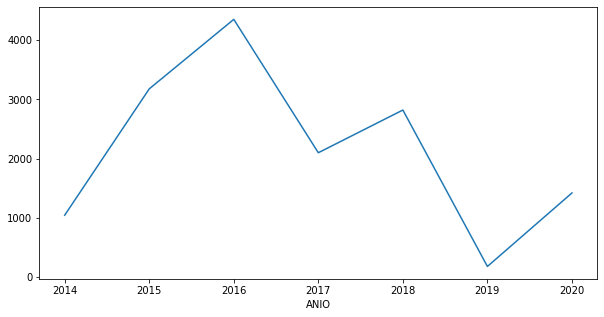

In [99]:
df_ACT["FE_RESULTADO"] = pd.to_datetime(df_ACT["FE_RESULTADO"])
df_ACT["ANIO"] = pd.DatetimeIndex(df_ACT["FE_RESULTADO"]).year

#Cantidad de pruebas por año
fig, ax = plt.subplots(figsize=(10,5))
df_ACT.groupby(["ANIO"]).count()["ID"].plot(ax=ax)
print(df_ACT.head(10))

* Se ve un comportamiento creciente para el año 2016 y desde ese momento en el tiempo se ve un comportamiento decreciente, con un pequeño pico en el año 2018.
* Además, se ve que existen datos que aparentemente son repetidos, por facilidad de interpretación, por ahora se van a eliminar. 

Cantidad de pruebas únicas: 458


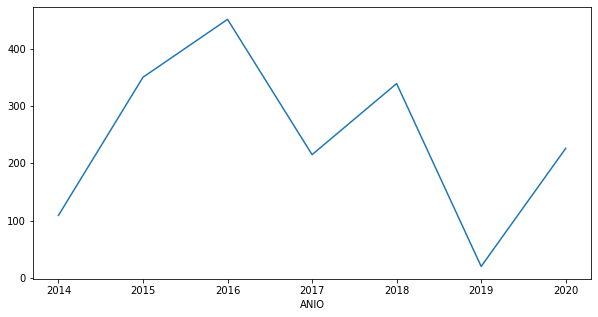

In [100]:
#Eliminar los duplicados
df_ACT_OK = df_ACT.drop_duplicates()
df_ACT_OK.to_csv("asd.csv")
#Graficar la tendencia de los no-duplicados
fig, ax = plt.subplots(figsize=(10,5))
df_ACT_OK.groupby(["ANIO"]).count()["ID"].plot(ax=ax)
print("Cantidad de pruebas únicas: " + str(df_ACT_OK["ID"].nunique()))

* Antes de la eliminiación de duplicados, se contaban con ~15.000 registros. Después de la eliminiación de los presuntos duplicados se cuentan con ~1.700 registros.
* Se puede observar que la tendencia en la cantidad de registros sigue siendo la misma que al tener los datos duplicados.
* Cabe resaltar que al haber quitado duplicados se puede ver la evolución efectiva de las pruebas a través del tiempo ya que se tiene un único valor por cada momento del tiempo.

Ahora, se busca estudiar la tendencia en la cantidad de ACT donde se resulta en un 1) no control, 2) control parcial o 3) control total.

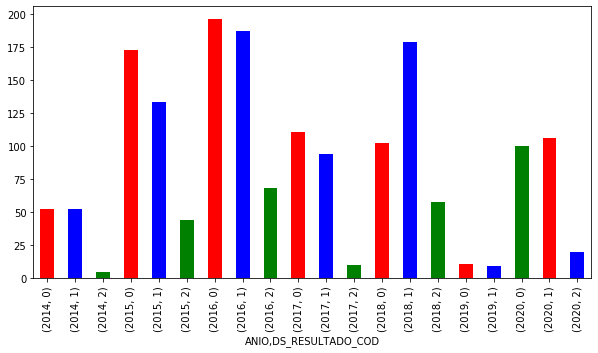

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
cantidad_año_control = df_ACT_OK.groupby(["ANIO","DS_RESULTADO_COD"]).count()["ID"]
ax = cantidad_año_control.plot.bar(rot=90,color=['red', 'blue', 'green'])

Ahora es necesario entender a partir de qué puntaje se considera que una evaluación de ACT se encuentre clasificado en alguna de las tres clasificaciones inciales. Para esto se hace una agrupación de las categorías con sus valores mínimos y máximos.

In [13]:
cantidad_grupo = pd.pivot_table(df_ACT_OK,
                          values = "NM_PUNTAJE",
                          index = "DS_RESULTADO_COD",
                          aggfunc = ["count","min","mean","max"])
cantidad_grupo

,count,min,mean,max
,NM_PUNTAJE,NM_PUNTAJE,NM_PUNTAJE,NM_PUNTAJE
DS_RESULTADO_COD,,,,
0,745,5,14.095302,19
1,760,20,21.936842,24
2,205,25,25.000000,25


In [14]:
df_ACT["LLAVE_EVOLUCION_ACT"] = df_ACT["ID"].map(str) + df_ACT["FE_RESULTADO"].map(str)
df_ACT["LLAVE_EVOLUCION_ACT"]
df_ACT_EVOL = df_ACT.drop_duplicates()
df_ACT_EVOL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1710 entries, 0 to 15081
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   1710 non-null   int64         
 1   DS_NOMBRE            1710 non-null   object        
 2   DS_RESULTADO_COD     1710 non-null   object        
 3   NM_PUNTAJE           1710 non-null   int64         
 4   DS_RESULTADO         1710 non-null   object        
 5   FE_RESULTADO         1710 non-null   datetime64[ns]
 6   ANIO                 1710 non-null   int64         
 7   LLAVE_EVOLUCION_ACT  1710 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 120.2+ KB


<font color='blue'> **---------------------------- ANALISIS DE LAS BD ACT DESAGREGADO ----------------------** </font>

Cantidad de mediciones (con duplicados): (8602, 6)
Cantidad de mediciones (sin duplicados): (8541, 6)


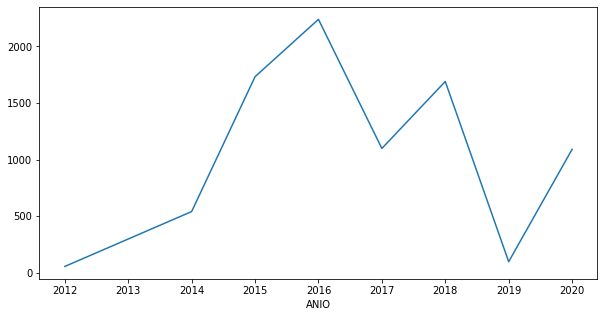

In [56]:
print("Cantidad de mediciones (con duplicados): "  + str(df_ACT_DSG.shape))
#Extraer el año
df_ACT_DSG["FE_RESULTADO"] = pd.to_datetime(df_ACT_DSG["FE_RESULTADO"])
df_ACT_DSG["ANIO"] = pd.DatetimeIndex(df_ACT_DSG["FE_RESULTADO"]).year
#Eliminar los duplicados
df_ACT_DSG_OK = df_ACT_DSG.drop_duplicates()
print("Cantidad de mediciones (sin duplicados): " + str(df_ACT_DSG_OK.shape))
#Cantidad de pruebas por año
fig, ax = plt.subplots(figsize=(10,5))
df_ACT_DSG_OK.groupby(["ANIO"]).count()["ID"].plot(ax=ax)
#print(df_ACT.head(10))

Se observa que presenta un comportamiento diferente al presentado en la base ACT generalizada.

Acording to the analysis done previously of the variables, there seems like not all the variables are related to ACT but to life-quality-related too. So for made an analysis it's necessary to create a new category as the DB is narrow-format.

In [66]:
df_ACT_DSG_OK.info()
print(df_ACT_DSG_OK["PREGUNTA_ACT"].unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8541 entries, 0 to 8601
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             8541 non-null   int64         
 1   DS_NOMBRE      8541 non-null   object        
 2   PREGUNTA_ACT   8541 non-null   object        
 3   RESPUESTA_ACT  8541 non-null   object        
 4   FE_RESULTADO   8541 non-null   datetime64[ns]
 5   ANIO           8541 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 467.1+ KB
['DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUENCIA SU ASMA LE IMPIDIO LLEVAR A CABO SUS TAREAS HABITUALES EN EL TRABAJO, EL ESTUDIO O EL HOGAR?'
 'DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUENCIA SINTIO FALTA DE AIRE?'
 'DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUENCIA LOS SINTOMAS DE ASMA (SILBIDOS EN EL PECHO, TOS, FALTA DE AIRE, OPRESION O DOLOR EN EL PECHO) LO/LA HICIERON DESPERTAR DURANTE LA NOCHE O MAS 

In [59]:
preguntas_ACT = ['DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUENCIA SU ASMA LE IMPIDIO LLEVAR A CABO SUS TAREAS HABITUALES EN EL TRABAJO, EL ESTUDIO O EL HOGAR?',
                'DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUENCIA SINTIO FALTA DE AIRE?',
                'DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUENCIA LOS SINTOMAS DE ASMA (SILBIDOS EN EL PECHO, TOS, FALTA DE AIRE, OPRESION O DOLOR EN EL PECHO) LO/LA HICIERON DESPERTAR DURANTE LA NOCHE O MAS TEMPRANO QUE DE COSTUMBRE POR LA MAÑANA?',
                'DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUENCIA USO SU INHALADOR DE EFECTO INMEDIATO O SE HIZO NEBULIZACIONES (POR EJEMPLO, SALBUTAMOL?)',
                '¿COMO CALIFICARIA EL CONTROL DE SU ASMA DURANTE LAS ULTIMAS 4 SEMANAS?']
preguntas_ACT_2 = {'PREGUNTA_ACT': pd.Series(preguntas_ACT, index=[1,2,3,4,5]),
     'PREGUNTA_ACT_COD': pd.Series(["ACT_1", "ACT_2", "ACT_3","ACT_4","ACT_5"], index=[1,2,3,4,5])}
df_preguntas_ACT_2 = pd.DataFrame(preguntas_ACT_2)
#Insertar las etiquietas para preguntas del ACT
df_ACT_DSG_OK.insert(2,"PREGUNTA_ACT_COD", df_ACT_DSG_OK["PREGUNTA_ACT"].map(df_preguntas_ACT_2.set_index("PREGUNTA_ACT")["PREGUNTA_ACT_COD"]))
#df_ACT_DSG_OK.info()

ValueError: cannot insert PREGUNTA_ACT_COD, already exists

Here it's necessary to provide a context to ACT and the answer related to each question (coded as ACT_X):
* ACT_1: how asthma have impedid work, school or home activities
* ACT_2: breathless frequency during the last 4 weeks
* ACT_3: how often the asthma symptoms have you waken up during night
* ACT_4: how often have you used your inhaler
* ACT_5: how you evaluate your asthma control during last 4 weeks

In [68]:
evolucion_puntaje = pd.pivot_table(df_ACT_DSG_OK[df_ACT_DSG_OK.PREGUNTA_ACT_COD =="ACT_1"],
                          values = "ID",
                          index = ["PREGUNTA_ACT_COD","RESPUESTA_ACT"],
                            columns = ["ANIO"],
                          aggfunc = ["count"]                        
                         )
evolucion_puntaje

count                                        \
ANIO                            2012  2014   2015   2016  2017   2018 2019   
PREGUNTA_ACT_COD RESPUESTA_ACT                                               
ACT_1            ALGUNAS VECES   NaN  19.0   48.0   85.0  35.0   39.0  3.0   
                 CASI SIEMPRE    1.0  10.0   29.0   18.0  19.0   33.0  3.0   
                 NUNCA           4.0  62.0  166.0  189.0  76.0  133.0  9.0   
                 POCAS VECES     5.0  13.0   78.0  149.0  69.0  127.0  3.0   
                 SIEMPRE         1.0   4.0   26.0    7.0  15.0    6.0  1.0   

                                       
ANIO                             2020  
PREGUNTA_ACT_COD RESPUESTA_ACT         
ACT_1            ALGUNAS VECES   27.0  
                 CASI SIEMPRE    14.0  
                 NUNCA          114.0  
                 POCAS VECES     58.0  
                 SIEMPRE          5.0

According to the description given above here are some conclussions for ACT's question 1:
* The major trends seems that asthma doesn't difficult some task for the patients as the major portion of answers are related to rarely or never.

In [19]:
evolucion_puntaje = pd.pivot_table(df_ACT_DSG_OK[df_ACT_DSG_OK.PREGUNTA_ACT_COD =="ACT_2"],
                          values = "ID",
                          index = ["PREGUNTA_ACT_COD","RESPUESTA_ACT"],
                            columns = ["ANIO"],
                          aggfunc = ["count"]                        
                         )
evolucion_puntaje

count                            \
ANIO                                         2012  2014   2015   2016  2017   
PREGUNTA_ACT_COD RESPUESTA_ACT                                                
ACT_2            1 O 2 VECES A LA SEMANA      5.0  28.0  104.0  178.0  90.0   
                 DE 3 A 6 VECES A LA SEMANA   NaN  14.0   36.0   58.0  26.0   
                 MAS DE UNA VEZ AL DIA        2.0  16.0   51.0   40.0  31.0   
                 NUNCA                        3.0  39.0  129.0  143.0  50.0   
                 UNA VEZ AL DIA               1.0  11.0   27.0   28.0  17.0   

                                                                
ANIO                                          2018 2019   2020  
PREGUNTA_ACT_COD RESPUESTA_ACT                                  
ACT_2            1 O 2 VECES A LA SEMANA     107.0  6.0   55.0  
                 DE 3 A 6 VECES A LA SEMANA   30.0  3.0   25.0  
                 MAS DE UNA VEZ AL DIA        12.0  5.0   20.0  
                 NUNCA                       164.0  4.0  103.0  
                 UNA VEZ AL DIA               25.0  1.0   15.0

In [20]:
evolucion_puntaje = pd.pivot_table(df_ACT_DSG_OK[df_ACT_DSG_OK.PREGUNTA_ACT_COD =="ACT_3"],
                          values = "ID",
                          index = ["PREGUNTA_ACT_COD","RESPUESTA_ACT"],
                            columns = ["ANIO"],
                          aggfunc = ["count"]                        
                         )
evolucion_puntaje

count                      \
ANIO                                             2012 2014 2015 2016 2017   
PREGUNTA_ACT_COD RESPUESTA_ACT                                              
ACT_3            DE 2 A 3 NOCHES EN A LA SEMANA     2   19   54   66   37   
                 MAS DE 4 NOCHES A LA SEMANA        2   12   54   34   24   
                 NUNCA                              3   50  114  174   87   
                 UNA O DOS VECES                    3   17   92  126   55   
                 UNA VEZ A LA SEMANA                1   10   33   50   11   

                                                                
ANIO                                            2018 2019 2020  
PREGUNTA_ACT_COD RESPUESTA_ACT                                  
ACT_3            DE 2 A 3 NOCHES EN A LA SEMANA   28    4   35  
                 MAS DE 4 NOCHES A LA SEMANA      10    2   18  
                 NUNCA                           180    3  124  
                 UNA O DOS VECES                  92    7   23  
                 UNA VEZ A LA SEMANA              28    4   18

In [21]:
evolucion_puntaje = pd.pivot_table(df_ACT_DSG_OK[df_ACT_DSG_OK.PREGUNTA_ACT_COD =="ACT_4"],
                          values = "ID",
                          index = ["PREGUNTA_ACT_COD","RESPUESTA_ACT"],
                            columns = ["ANIO"],
                          aggfunc = ["count"]                        
                         )
evolucion_puntaje

count                            \
ANIO                                        2012  2014   2015   2016  2017   
PREGUNTA_ACT_COD RESPUESTA_ACT                                               
ACT_4            1 O 2 VECES AL DIA          1.0  12.0   71.0   54.0  24.0   
                 1 VEZ A LA SEMANA O MENOS   6.0  24.0   53.0  141.0  58.0   
                 2 O 3 VECES A LA SEMANA     NaN  18.0   46.0   76.0  32.0   
                 MAS DE 3 VECES AL DIA       2.0  23.0   56.0   43.0  49.0   
                 NUNCA                       2.0  31.0  119.0  133.0  52.0   

                                                              
ANIO                                         2018 2019  2020  
PREGUNTA_ACT_COD RESPUESTA_ACT                                
ACT_4            1 O 2 VECES AL DIA          37.0  4.0  59.0  
                 1 VEZ A LA SEMANA O MENOS  117.0  5.0  40.0  
                 2 O 3 VECES A LA SEMANA     49.0  6.0  15.0  
                 MAS DE 3 VECES AL DIA       18.0  3.0  30.0  
                 NUNCA                      117.0  2.0  74.0

In [22]:
evolucion_puntaje = pd.pivot_table(df_ACT_DSG_OK[df_ACT_DSG_OK.PREGUNTA_ACT_COD =="ACT_5"],
                          values = "ID",
                          index = ["PREGUNTA_ACT_COD","RESPUESTA_ACT"],
                            columns = ["ANIO"],
                          aggfunc = ["count"]                        
                         )
evolucion_puntaje

count                             \
ANIO                                    2012  2014   2015   2016   2017   
PREGUNTA_ACT_COD RESPUESTA_ACT                                            
ACT_5            ALGO CONTROLADA         2.0  24.0   75.0   91.0   44.0   
                 BIEN CONTROLADA         6.0  56.0  155.0  226.0  127.0   
                 MAL CONTROLADA          1.0  11.0   28.0   29.0    7.0   
                 NADA CONTROLADA         NaN   4.0   11.0    5.0   10.0   
                 TOTALMENTE CONTROLADA   2.0  13.0   77.0   96.0   26.0   

                                                            
ANIO                                     2018  2019   2020  
PREGUNTA_ACT_COD RESPUESTA_ACT                              
ACT_5            ALGO CONTROLADA         46.0   4.0   45.0  
                 BIEN CONTROLADA        189.0  11.0  137.0  
                 MAL CONTROLADA          27.0   1.0   10.0  
                 NADA CONTROLADA          2.0   1.0    2.0  
                 TOTALMENTE CONTROLADA   74.0   2.0   24.0

<font color='blue'> **---------------------------- AGREGAR LAS BASES DE DATOS ----------------------** </font>

En primer lugar es necesario codificar todas las respuesta del ACT en la base desagregada para poder cuantificar el puntaje final

In [31]:
df_ACT_DSG_OK["RESPUESTA_ACT"].unique()

array(['POCAS VECES', '1 O 2 VECES A LA SEMANA',
       'DE 2 A 3 NOCHES EN A LA SEMANA', '1 VEZ A LA SEMANA O MENOS',
       'BIEN CONTROLADA', 'UNA O DOS VECES', 'UNA VEZ A LA SEMANA',
       'ALGO CONTROLADA', 'SIEMPRE', 'MAS DE UNA VEZ AL DIA',
       'MAS DE 4 NOCHES A LA SEMANA', 'MAS DE 3 VECES AL DIA',
       'MAL CONTROLADA', 'UNA VEZ AL DIA', '1 O 2 VECES AL DIA', 'NUNCA',
       'CASI SIEMPRE', 'TOTALMENTE CONTROLADA', '2 O 3 VECES A LA SEMANA',
       'DE 3 A 6 VECES A LA SEMANA', 'ALGUNAS VECES', 'NADA CONTROLADA',
       'LO NORMAL', 'ENTRE 13 MESES Y 2 AÑOS', 'NADA', 'BASTANTE',
       'UN POCO', 'MODERADO', 'INSATISFECHO', 'BASTANTE SATISFECHO',
       'RARAMENTE'], dtype=object)

In [60]:
#Cambiar para las del ACT - pregunta 1
pregunta_ACT_uno = ['SIEMPRE',
                'CASI SIEMPRE',
                'ALGUNAS VECES',
                'POCAS VECES',
                'NUNCA']
pregunta_ACT_uno_r = {'PREGUNTA_ACT': pd.Series(pregunta_ACT_uno, index=[1,2,3,4,5]),
     'RESPUESTA_ACT_COD': pd.Series([1, 2, 3,4,5], index=[1,2,3,4,5])}
df_pregunta_ACT_uno = pd.DataFrame(pregunta_ACT_uno_r)
#Insertar las etiquietas para preguntas del ACT
df_ACT_DSG_OK.insert(5,"RESPUESTA_ACT_COD_UNO", df_ACT_DSG_OK["RESPUESTA_ACT"].map(df_pregunta_ACT_uno.set_index("PREGUNTA_ACT")["RESPUESTA_ACT_COD"]))
df_ACT_DSG_OK.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8541 entries, 0 to 8601
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     8541 non-null   int64         
 1   DS_NOMBRE              8541 non-null   object        
 2   PREGUNTA_ACT_COD       8514 non-null   object        
 3   PREGUNTA_ACT           8541 non-null   object        
 4   RESPUESTA_ACT          8541 non-null   object        
 5   RESPUESTA_ACT_COD_UNO  3603 non-null   float64       
 6   FE_RESULTADO           8541 non-null   datetime64[ns]
 7   ANIO                   8541 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 600.5+ KB


In [61]:
#Cambiar para las del ACT - pregunta 2
pregunta_ACT_dos = ['MAS DE UNA VEZ AL DIA',
                'UNA VEZ AL DIA',
                'DE 3 A 6 VECES A LA SEMANA',
                '1 O 2 VECES A LA SEMANA']
pregunta_ACT_dos_r = {'PREGUNTA_ACT': pd.Series(pregunta_ACT_dos, index=[1,2,3,4]),
     'RESPUESTA_ACT_COD': pd.Series([1,2, 3,4], index=[1,2,3,4])}
df_pregunta_ACT_dos = pd.DataFrame(pregunta_ACT_dos_r)
#Insertar las etiquietas para preguntas del ACT
df_ACT_DSG_OK.insert(5,"RESPUESTA_ACT_COD_DOS", df_ACT_DSG_OK["RESPUESTA_ACT"].map(df_pregunta_ACT_dos.set_index("PREGUNTA_ACT")["RESPUESTA_ACT_COD"]))
df_ACT_DSG_OK.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8541 entries, 0 to 8601
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     8541 non-null   int64         
 1   DS_NOMBRE              8541 non-null   object        
 2   PREGUNTA_ACT_COD       8514 non-null   object        
 3   PREGUNTA_ACT           8541 non-null   object        
 4   RESPUESTA_ACT          8541 non-null   object        
 5   RESPUESTA_ACT_COD_DOS  1067 non-null   float64       
 6   RESPUESTA_ACT_COD_UNO  3603 non-null   float64       
 7   FE_RESULTADO           8541 non-null   datetime64[ns]
 8   ANIO                   8541 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 667.3+ KB


In [62]:
#Cambiar para las del ACT - pregunta 3
pregunta_ACT_tres = ['MAS DE 4 NOCHES A LA SEMANA',
                'DE 2 A 3 NOCHES EN A LA SEMANA',
                'UNA VEZ A LA SEMANA',
                'UNA O DOS VECES']
pregunta_ACT_tres_r = {'PREGUNTA_ACT': pd.Series(pregunta_ACT_tres, index=[1,2,3,4]),
     'RESPUESTA_ACT_COD': pd.Series([1,2, 3,4], index=[1,2,3,4])}
df_pregunta_ACT_tres = pd.DataFrame(pregunta_ACT_tres_r)
#Insertar las etiquietas para preguntas del ACT
df_ACT_DSG_OK.insert(5,"RESPUESTA_ACT_COD_TRES", df_ACT_DSG_OK["RESPUESTA_ACT"].map(df_pregunta_ACT_tres.set_index("PREGUNTA_ACT")["RESPUESTA_ACT_COD"]))
df_ACT_DSG_OK.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8541 entries, 0 to 8601
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      8541 non-null   int64         
 1   DS_NOMBRE               8541 non-null   object        
 2   PREGUNTA_ACT_COD        8514 non-null   object        
 3   PREGUNTA_ACT            8541 non-null   object        
 4   RESPUESTA_ACT           8541 non-null   object        
 5   RESPUESTA_ACT_COD_TRES  971 non-null    float64       
 6   RESPUESTA_ACT_COD_DOS   1067 non-null   float64       
 7   RESPUESTA_ACT_COD_UNO   3603 non-null   float64       
 8   FE_RESULTADO            8541 non-null   datetime64[ns]
 9   ANIO                    8541 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 734.0+ KB


In [63]:
#Cambiar para las del ACT - pregunta 4
pregunta_ACT_cuatro = ['MAS DE 3 VECES AL DIA',
                '1 O 2 VECES AL DIA',
                '2 O 3 VECES A LA SEMANA',
                '1 VEZ A LA SEMANA O MENOS']
pregunta_ACT_cuatro_r = {'PREGUNTA_ACT': pd.Series(pregunta_ACT_cuatro, index=[1,2,3,4]),
     'RESPUESTA_ACT_COD': pd.Series([1,2, 3,4], index=[1,2,3,4])}
df_pregunta_ACT_cuatro = pd.DataFrame(pregunta_ACT_cuatro_r)
#Insertar las etiquietas para preguntas del ACT
df_ACT_DSG_OK.insert(5,"RESPUESTA_ACT_COD_CUATRO", df_ACT_DSG_OK["RESPUESTA_ACT"].map(df_pregunta_ACT_cuatro.set_index("PREGUNTA_ACT")["RESPUESTA_ACT_COD"]))
df_ACT_DSG_OK.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8541 entries, 0 to 8601
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        8541 non-null   int64         
 1   DS_NOMBRE                 8541 non-null   object        
 2   PREGUNTA_ACT_COD          8514 non-null   object        
 3   PREGUNTA_ACT              8541 non-null   object        
 4   RESPUESTA_ACT             8541 non-null   object        
 5   RESPUESTA_ACT_COD_CUATRO  1172 non-null   float64       
 6   RESPUESTA_ACT_COD_TRES    971 non-null    float64       
 7   RESPUESTA_ACT_COD_DOS     1067 non-null   float64       
 8   RESPUESTA_ACT_COD_UNO     3603 non-null   float64       
 9   FE_RESULTADO              8541 non-null   datetime64[ns]
 10  ANIO                      8541 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 800.7+ KB


In [64]:
#Cambiar para las del ACT - pregunta 5
pregunta_ACT_cinco = ['NADA CONTROLADA',
                'MAL CONTROLADA',
                'ALGO CONTROLADA',
                'BIEN CONTROLADA',
                'TOTALMENTE CONTROLADA']
pregunta_ACT_cinco_r = {'PREGUNTA_ACT': pd.Series(pregunta_ACT_cinco, index=[1,2,3,4,5]),
     'RESPUESTA_ACT_COD': pd.Series([1,2, 3,4,5], index=[1,2,3,4,5])}
df_pregunta_ACT_cinco = pd.DataFrame(pregunta_ACT_cinco_r)
#Insertar las etiquietas para preguntas del ACT
df_ACT_DSG_OK.insert(5,"RESPUESTA_ACT_COD_CINCO", df_ACT_DSG_OK["RESPUESTA_ACT"].map(df_pregunta_ACT_cinco.set_index("PREGUNTA_ACT")["RESPUESTA_ACT_COD"]))
df_ACT_DSG_OK.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8541 entries, 0 to 8601
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        8541 non-null   int64         
 1   DS_NOMBRE                 8541 non-null   object        
 2   PREGUNTA_ACT_COD          8514 non-null   object        
 3   PREGUNTA_ACT              8541 non-null   object        
 4   RESPUESTA_ACT             8541 non-null   object        
 5   RESPUESTA_ACT_COD_CINCO   1701 non-null   float64       
 6   RESPUESTA_ACT_COD_CUATRO  1172 non-null   float64       
 7   RESPUESTA_ACT_COD_TRES    971 non-null    float64       
 8   RESPUESTA_ACT_COD_DOS     1067 non-null   float64       
 9   RESPUESTA_ACT_COD_UNO     3603 non-null   float64       
 10  FE_RESULTADO              8541 non-null   datetime64[ns]
 11  ANIO                      8541 non-null   int64         
dtypes: datetime64[ns](1)

In [65]:
ACT_respuestas = ["RESPUESTA_ACT_COD_UNO","RESPUESTA_ACT_COD_DOS","RESPUESTA_ACT_COD_TRES","RESPUESTA_ACT_COD_CUATRO","RESPUESTA_ACT_COD_CINCO"]
df_ACT_DSG_OK2 = df_ACT_DSG_OK.assign(RESPUESTA_ACT_COD = df_ACT_DSG_OK[ACT_respuestas].sum(1)).drop(ACT_respuestas,1)

In [73]:
print(df_ACT_DSG_OK2.head(5))

       ID                       DS_NOMBRE PREGUNTA_ACT_COD  \
0  535255  Prueba de control del Asma ACT            ACT_1   
1  535255  Prueba de control del Asma ACT            ACT_2   
2  535255  Prueba de control del Asma ACT            ACT_3   
3  535255  Prueba de control del Asma ACT            ACT_4   
4  535255  Prueba de control del Asma ACT            ACT_5   

                                        PREGUNTA_ACT  \
0  DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUEN...   
1  DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUEN...   
2  DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUEN...   
3  DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUEN...   
4  ¿COMO CALIFICARIA EL CONTROL DE SU ASMA DURANT...   

                    RESPUESTA_ACT FE_RESULTADO  ANIO  RESPUESTA_ACT_COD  
0                     POCAS VECES   2012-06-29  2012                4.0  
1         1 O 2 VECES A LA SEMANA   2012-06-29  2012                4.0  
2  DE 2 A 3 NOCHES EN A LA SEMANA   2012-06-29  2012                

In [70]:
evolucion_puntaje = pd.pivot_table(df_ACT_DSG_OK2,
                          values = "ID",
                          index = ["PREGUNTA_ACT_COD","RESPUESTA_ACT_COD"],
                            columns = ["ANIO"],
                          aggfunc = ["count"]                        
                         )
evolucion_puntaje

count                                    \
ANIO                                2012  2014   2015   2016   2017   2018   
PREGUNTA_ACT_COD RESPUESTA_ACT_COD                                           
ACT_1            1.0                 1.0   4.0   26.0    7.0   15.0    6.0   
                 2.0                 1.0  10.0   29.0   18.0   19.0   33.0   
                 3.0                 NaN  19.0   48.0   85.0   35.0   39.0   
                 4.0                 5.0  13.0   78.0  149.0   69.0  127.0   
                 5.0                 4.0  62.0  166.0  189.0   76.0  133.0   
ACT_2            1.0                 2.0  16.0   51.0   40.0   31.0   12.0   
                 2.0                 1.0  11.0   27.0   28.0   17.0   25.0   
                 3.0                 NaN  14.0   36.0   58.0   26.0   30.0   
                 4.0                 5.0  28.0  104.0  178.0   90.0  107.0   
                 5.0                 3.0  39.0  129.0  143.0   50.0  164.0   
ACT_3            1.0                 2.0  12.0   54.0   34.0   24.0   10.0   
                 2.0                 2.0  19.0   54.0   66.0   37.0   28.0   
                 3.0                 1.0  10.0   33.0   50.0   11.0   28.0   
                 4.0                 3.0  17.0   92.0  126.0   55.0   92.0   
                 5.0                 3.0  50.0  114.0  174.0   87.0  180.0   
ACT_4            1.0                 2.0  23.0   56.0   43.0   49.0   18.0   
                 2.0                 1.0  12.0   71.0   54.0   24.0   37.0   
                 3.0                 NaN  18.0   46.0   76.0   32.0   49.0   
                 4.0                 6.0  24.0   53.0  141.0   58.0  117.0   
                 5.0                 2.0  31.0  119.0  133.0   52.0  117.0   
ACT_5            1.0                 NaN   4.0   11.0    5.0   10.0    2.0   
                 2.0                 1.0  11.0   28.0   29.0    7.0   27.0   
                 3.0                 2.0  24.0   75.0   91.0   44.0   46.0   
                 4.0                 6.0  56.0  155.0  226.0  127.0  189.0   
                 5.0                 2.0  13.0   77.0   96.0   26.0   74.0   

                                                 
ANIO                                2019   2020  
PREGUNTA_ACT_COD RESPUESTA_ACT_COD               
ACT_1            1.0                 1.0    5.0  
                 2.0                 3.0   14.0  
                 3.0                 3.0   27.0  
                 4.0                 3.0   58.0  
                 5.0                 9.0  114.0  
ACT_2            1.0                 5.0   20.0  
                 2.0                 1.0   15.0  
                 3.0                 3.0   25.0  
                 4.0                 6.0   55.0  
                 5.0                 4.0  103.0  
ACT_3            1.0                 2.0   18.0  
                 2.0                 4.0   35.0  
                 3.0                 4.0   18.0  
                 4.0                 7.0   23.0  
                 5.0                 3.0  124.0  
ACT_4            1.0                 3.0   30.0  
                 2.0                 4.0   59.0  
                 3.0                 6.0   15.0  
                 4.0                 5.0   40.0  
                 5.0                 2.0   74.0  
ACT_5            1.0                 1.0    2.0  
                 2.0                 1.0   10.0  
                 3.0                 4.0   45.0  
                 4.0                11.0  137.0  
                 5.0                 2.0   24.0

In [150]:
ACT_agregado = pd.pivot_table(df_ACT_DSG_OK2,
                          values = "RESPUESTA_ACT_COD",
                          index = ["FE_RESULTADO","ID"],
                          aggfunc = ["sum"]                        
                         )
ACT_agregado2 = pd.DataFrame(ACT_agregado.to_records())
ACT_agregado2.rename(columns={"('sum', 'RESPUESTA_ACT_COD')": "NM_PUNTAJE"}, inplace=True)
ACT_agregado2.reset_index(drop=True)
ACT_agregado2.shape

(1694, 3)

In [151]:
df_ACT_OK2 = df_ACT_OK.copy()
df_ACT_OK2.shape

(1710, 7)

In [158]:
frames = [ACT_agregado2,df_ACT_OK2]
df_ACT_DEF = pd.concat(frames)
df_ACT_DEF.shape

(3404, 8)

In [167]:
resultados_codificados = {range(0, 19): 0, range(20, 24): 1, range(25,26): 2}
df_ACT_DEF["DS_RESULTADOS_COD_2"] = df_ACT_DEF["NM_PUNTAJE"].apply(lambda x: next((v for k, v in resultados_codificados.items() if x in k), 1))
df_ACT_DEF["ANIO"] = pd.DatetimeIndex(df_ACT_DEF["FE_RESULTADO"]).year
print(df_ACT_DEF.shape)
df_ACT_DEF_2 = df_ACT_DEF.drop_duplicates()
print(df_ACT_DEF_2.shape)

(3404, 8)
(3404, 8)


In [175]:
df_ACT_DEF_2.to_csv("ACT.csv")